In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
ames_df = pd.read_csv('../data/dummied_train.csv')

In [3]:
ames_df.head()

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,garage_type_None,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,68.0,13517,2,4,1,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,2,4,1,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,1,4,1,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,1,4,1,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,2,4,1,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
pd.options.display.max_columns = 999
is_NaN = ames_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ames_df[row_has_NaN]
rows_with_NaN

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,electrical,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
1693,50.0,9060,1,4,1,5,6,1923,1999,0.0,3,3,4,3,1,5,1,859.0,5,5,1828,0.0,0.0,2,0,3,1,4,6,8,0,0,0,NaN,NaN,0,0,3,174,0,212,0,0,0,0,3,2007,150909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [5]:
#replace NaN with NA
ames_df['garage_cars'] = ames_df['garage_cars'].replace(np.nan,0)

In [6]:
#replace NaN with NA
ames_df['garage_area'] = ames_df['garage_cars'].replace(np.nan,0)

In [7]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Columns: 212 entries, lot_frontage to sale_type_WD 
dtypes: float64(7), int64(205)
memory usage: 3.3 MB


In [8]:
ames_df['saleprice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2022    298751
2023     82500
2024    177000
2025    144000
2026    189000
Name: saleprice, Length: 2027, dtype: int64

### Model Prep: Create features matrix ( X ) and target vector ( y ) 

In [9]:
features = ames_df.drop('saleprice', axis=1)
X = features
print(X)

      lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0             68.0     13517          2          4           1             6   
1             43.0     11492          2          4           1             7   
2             68.0      7922          1          4           1             5   
3             73.0      9802          1          4           1             5   
4             82.0     14235          2          4           1             6   
...            ...       ...        ...        ...         ...           ...   
2022          79.0     11449          2          4           1             8   
2023          68.0     12342          2          4           1             4   
2024          57.0      7558          1          4           1             6   
2025          80.0     10400          1          4           1             4   
2026          60.0      7500          1          4           1             7   

      overall_cond  year_built  year_re

In [10]:
y = ames_df['saleprice']

### Model Prep: Train/test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Model Prep: Scaling

In [12]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Model Prep: Instantiate model

In [13]:
lr = LinearRegression()

In [14]:
lasso = LassoCV(n_alphas=200)

In [15]:
ridge = RidgeCV (alphas=np.linspace(.1, 10, 100))

### Cross validation

In [16]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-3.369739812381325e+21

In [17]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.8342889976869209

In [18]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.822580044887068

### Model Fitting and Evaluation

In [19]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [20]:
ridge.score(X_train, y_train)

0.9187072057858154

In [21]:
ridge.score(X_test, y_test)

0.8891462746051504

In [22]:
ridge_scores.mean()

0.822580044887068

In [23]:
y_pred = ridge.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.8891462746051504

In [25]:
residuals = y_test - y_pred

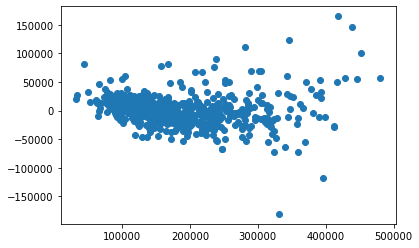

In [26]:
plt.scatter(y_pred, residuals);

In [27]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

27241.296061250017

In [28]:
y_train.mean()

180639.22708039492

In [29]:
y_test.mean()

187230.4630541872

In [30]:
y_pred.mean()

186367.3351299346

In [31]:
y_pred.shape

(609,)

In [32]:
y_pred[y_pred > 500000]

array([], dtype=float64)

In [33]:
y_test.shape

(609,)

In [34]:
mse = ((y_test - y_pred)**2).sum() / len(y_test)

In [35]:
mse

742088211.0966756

(array([ 51., 232., 148.,  86.,  51.,  14.,  17.,   4.,   2.,   4.]),
 array([ 52500., 105700., 158900., 212100., 265300., 318500., 371700.,
        424900., 478100., 531300., 584500.]),
 <BarContainer object of 10 artists>)

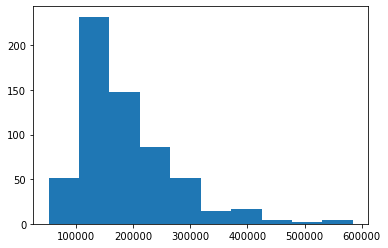

In [36]:
#histogram of 'saleprice' from y_test 
plt.hist(y_test)

(array([ 18.,  96., 183., 117.,  88.,  48.,  31.,  14.,  10.,   4.]),
 array([ 31995.75759595,  76863.14763024, 121730.53766453, 166597.92769882,
        211465.31773311, 256332.7077674 , 301200.09780169, 346067.48783598,
        390934.87787027, 435802.26790456, 480669.65793885]),
 <BarContainer object of 10 artists>)

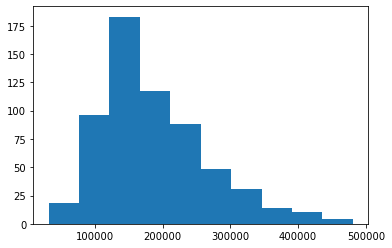

In [37]:
#histogram from 'saleprice' of y_pred
plt.hist(y_pred)

In [38]:
#from train data, drop 'saleprice' to get X columns
features = [col for col in ames_df._get_numeric_data().columns if col != 'saleprice']
X = ames_df[features]
y = ames_df['saleprice']

In [39]:
#predict 'saleprice' from X columns to get y_train_pred
y_train_pred = ridge.predict(X)

In [40]:
#find rmse of y_train and y_train_predict
metrics.mean_absolute_error(y, y_train_pred)

107985495.26959555